train.csv - Input features and target fare_amount values for the training set (about 55M rows).
test.csv - Input features for the test set (about 10K rows). Your goal is to predict fare_amount for each row.

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [14]:
train_df=pd.read_csv("train.csv", nrows=2000)
test_df=pd.read_csv("test.csv", nrows=500)
print (train_df.shape)
print (train_df.columns)
print (test_df.shape)
print (test_df.columns)

(2000, 8)
Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count'],
      dtype='object')
(500, 7)
Index(['key', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   key                2000 non-null   object 
 1   fare_amount        2000 non-null   float64
 2   pickup_datetime    2000 non-null   object 
 3   pickup_longitude   2000 non-null   float64
 4   pickup_latitude    2000 non-null   float64
 5   dropoff_longitude  2000 non-null   float64
 6   dropoff_latitude   2000 non-null   float64
 7   passenger_count    2000 non-null   int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 125.1+ KB


#here we can see there are 8columns in which 6 numerics and 2 are object.
#Lets change the type of pickup_datetime from object to DateTime

In [15]:
train_df["pickup_datetime"]=pd.to_datetime(train_df['pickup_datetime'])

In [7]:
train_df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1


#As this is Taxi fare data and we know there are many factors which affect the price of taxi like 
1. Travelled distance
2. Time of Travel
3. Demand and Availability of Taxi
4. Some special places are more costlier like Airport or other places where there might be toll

In [6]:
#Lets see the statisitics of our data

In [6]:
train_df.shape

(2000, 8)

In [8]:
train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fare_amount,2000.0,11.482770,10.517730,2.500000,6.000000,8.500000,12.900000,180.000000
pickup_longitude,2000.0,-72.458755,10.485210,-74.438233,-73.992352,-73.981545,-73.966593,0.000000
pickup_latitude,2000.0,39.916183,5.776037,0.000000,40.734665,40.753306,40.767792,41.366138
dropoff_longitude,2000.0,-72.457441,10.485073,-74.429332,-73.991436,-73.980335,-73.963247,0.016852
dropoff_latitude,2000.0,39.915691,5.776020,0.000000,40.733395,40.753433,40.767510,41.032598
passenger_count,2000.0,1.603500,1.225985,0.000000,1.000000,1.000000,2.000000,6.000000


#Here first thing which we can see is minimum value of fare is negative which is -62 which is not the valid value, so we need to remove the fare which are negative values.
#Secondly, passenger_count minimum value is 0 and maximum value is 208 which impossible, so we need to remove them as well, for safer side we can think that a taxi can have maximum 7 people.

In [8]:
train_df.isna().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [9]:
#Lets check if there is any null value
train_df.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

#Here we can see there are 14 null values in drop_off latitude and longitude. as removing 14 to 28 rows from our huge dataset will not affect our analysis so, lets remove the rows having null values 


In [9]:
test_df.isnull().sum().sum()

0

In [10]:
train_df.isna().sum().sum()

0

In [11]:
train_df.dropna(inplace=True)
print(train_df.isnull().sum())

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/Users/manikantkandukuri/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fare_amount', ylabel='Density'>

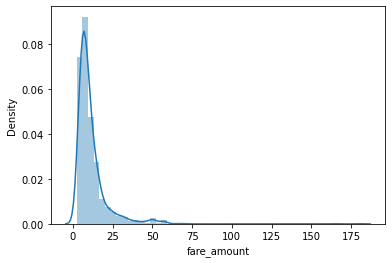

In [11]:
sns.distplot(train_df['fare_amount'], kde = True)

/Users/manikantkandukuri/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fare_amount'>

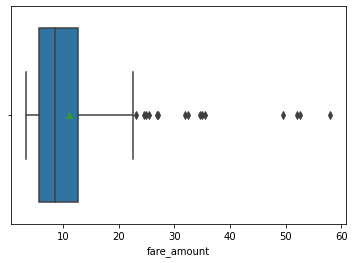

In [23]:
sns.boxplot(train_df["fare_amount"], showmeans = True )

#In distribution plot also it can be seen that there are some values which are negative fare

/Users/manikantkandukuri/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pickup_latitude', ylabel='Density'>

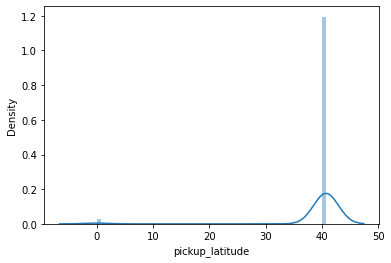

In [23]:
sns.distplot(train_df['pickup_latitude'])

#Here we can see minimum value is going to be less than even -3000 which is not correct value and also on positive side also going more than 2000

/Users/manikantkandukuri/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pickup_longitude', ylabel='Density'>

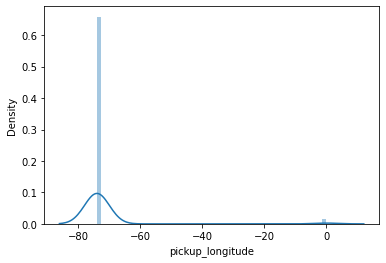

In [24]:
sns.distplot(train_df['pickup_longitude'])

#Here also negative and positive values are excedding far behond the real limit.

/Users/manikantkandukuri/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='dropoff_longitude', ylabel='Density'>

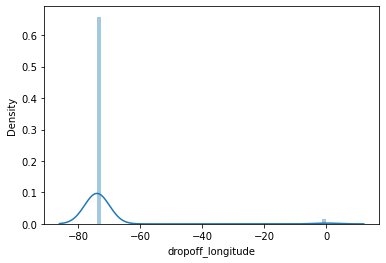

In [25]:
sns.distplot(train_df['dropoff_longitude'])

In [15]:
#Similarly here also same issue

/Users/manikantkandukuri/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='dropoff_latitude', ylabel='Density'>

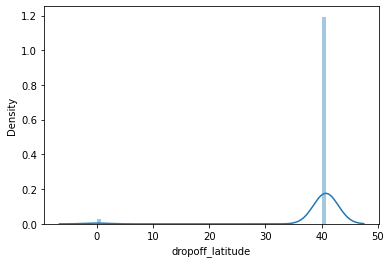

In [26]:
sns.distplot(train_df['dropoff_latitude'])

In [17]:
#here also we have noisy data as given value of dropoff_latitude and longitude are excedding

In [18]:
#lets look min and max value in test dataset of latitude and longitude

In [16]:
train_df["pickup_latitude"].min(), train_df["pickup_latitude"].max()

(0.0, 41.366138)

In [17]:
print("drop_off latitude min value",test_df["dropoff_latitude"].min())
print("drop_off latitude max value",test_df["dropoff_latitude"].max())
print("drop_off longitude min value", test_df["dropoff_longitude"].min())
print("drop_off longitude max value",test_df["dropoff_longitude"].max())
print("pickup latitude min value",test_df["pickup_latitude"].min())
print("pickup latitude max value",test_df["pickup_latitude"].max())
print("pickup longitude min value",test_df["pickup_longitude"].min())
print("pickup longitude max value",test_df["pickup_longitude"].max())

drop_off latitude min value 40.633798
drop_off latitude max value 41.051657
drop_off longitude min value -74.178053
drop_off longitude max value -73.741922
pickup latitude min value 40.643745
pickup latitude max value 41.06966
pickup longitude min value -74.047394
pickup longitude max value -73.777282


#we can see what is range of latitude and longitude of our test dataset, lets keep the range same in our train set so that even noisy data is remove and we have only the values which belongs to new york

In [18]:
min_longitude=-74.263242,
min_latitude=40.573143,
max_longitude=-72.986532, 
max_latitude=41.709555

In [21]:
#lets drop all the values which are not coming in above boundary, as those are noisy data

In [19]:
tempdf=train_df[(train_df["dropoff_latitude"]<min_latitude) | (train_df["pickup_latitude"]<min_latitude) | (train_df["dropoff_longitude"]<min_longitude) | (train_df["pickup_longitude"]<min_longitude) | (train_df["dropoff_latitude"]>max_latitude) | (train_df["pickup_latitude"]>max_latitude) | (train_df["dropoff_longitude"]>max_longitude) | (train_df["pickup_longitude"]>max_longitude) ]
print("before droping",train_df.shape)
train_df.drop(tempdf.index,inplace=True)
print("after droping",train_df.shape)

before droping (2000, 8)
after droping (1956, 8)


In [23]:
#lets remove all those rows where fare amount is negative

In [20]:
print("before droping", train_df.shape)
train_df=train_df[train_df['fare_amount']>0]
print("after droping", train_df.shape)

before droping (1956, 8)
after droping (1956, 8)


In [20]:
train_df.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [35]:
str(train_df.pickup_datetime)

'0      2009-06-15 17:26:21+00:00\n1      2010-01-05 16:52:16+00:00\n2      2011-08-18 00:35:00+00:00\n3      2012-04-21 04:30:42+00:00\n4      2010-03-09 07:51:00+00:00\n                  ...           \n1995   2014-05-06 08:50:00+00:00\n1996   2009-06-08 22:02:00+00:00\n1997   2011-07-25 08:51:00+00:00\n1998   2011-10-01 19:56:23+00:00\n1999   2015-02-01 02:25:02+00:00\nName: pickup_datetime, Length: 1956, dtype: datetime64[ns, UTC]'

In [36]:
import calendar


#On different day and time there would be different price like during eveing price would be more compare to afternoon, during christmas price would be different and similarly on weekends price would be different compare to week days. so lets create some extra features which will take care of all these things

In [21]:
train_df["pickup_datetime"]=pd.to_datetime(train_df['pickup_datetime'])

In [22]:
import calendar
train_df['day']=train_df['pickup_datetime'].apply(lambda x:x.day)
train_df['hour']=train_df['pickup_datetime'].apply(lambda x:x.hour)
train_df['weekday']=train_df['pickup_datetime'].apply(lambda x:calendar.day_name[x.weekday()])
train_df['month']=train_df['pickup_datetime'].apply(lambda x:x.month)
train_df['year']=train_df['pickup_datetime'].apply(lambda x:x.year)

In [39]:
train_df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,hour,weekday,month,year
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,15,17,Monday,6,2009
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,5,16,Tuesday,1,2010
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,18,0,Thursday,8,2011
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,21,4,Saturday,4,2012
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,9,7,Tuesday,3,2010


In [27]:
#here we can see that week are in monday , tuesday and so on. So we need convert them in numerical for

In [23]:
train_df.weekday = train_df.weekday.map({'Sunday':0,'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6})

In [24]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1956 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   key                1956 non-null   object             
 1   fare_amount        1956 non-null   float64            
 2   pickup_datetime    1956 non-null   datetime64[ns, UTC]
 3   pickup_longitude   1956 non-null   float64            
 4   pickup_latitude    1956 non-null   float64            
 5   dropoff_longitude  1956 non-null   float64            
 6   dropoff_latitude   1956 non-null   float64            
 7   passenger_count    1956 non-null   int64              
 8   day                1956 non-null   int64              
 9   hour               1956 non-null   int64              
 10  weekday            1956 non-null   int64              
 11  month              1956 non-null   int64              
 12  year               1956 non-null   int64        

In [30]:
# we will keep only those rows where number of passangers are less than or equal to 8

In [25]:
train_df=train_df[train_df['passenger_count']<=8]

In [26]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1956 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   key                1956 non-null   object             
 1   fare_amount        1956 non-null   float64            
 2   pickup_datetime    1956 non-null   datetime64[ns, UTC]
 3   pickup_longitude   1956 non-null   float64            
 4   pickup_latitude    1956 non-null   float64            
 5   dropoff_longitude  1956 non-null   float64            
 6   dropoff_latitude   1956 non-null   float64            
 7   passenger_count    1956 non-null   int64              
 8   day                1956 non-null   int64              
 9   hour               1956 non-null   int64              
 10  weekday            1956 non-null   int64              
 11  month              1956 non-null   int64              
 12  year               1956 non-null   int64        

In [33]:
#here key column and pickup_datetime columns are not needed as we have already created variables extracted from it

In [27]:
train_df.drop(["key","pickup_datetime"], axis=1, inplace=True)

In [28]:
train_df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,hour,weekday,month,year
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,15,17,1,6,2009
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,5,16,2,1,2010
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,18,0,4,8,2011
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,21,4,6,4,2012
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,9,7,2,3,2010


In [30]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1956 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fare_amount        1956 non-null   float64
 1   pickup_longitude   1956 non-null   float64
 2   pickup_latitude    1956 non-null   float64
 3   dropoff_longitude  1956 non-null   float64
 4   dropoff_latitude   1956 non-null   float64
 5   passenger_count    1956 non-null   int64  
 6   day                1956 non-null   int64  
 7   hour               1956 non-null   int64  
 8   weekday            1956 non-null   int64  
 9   month              1956 non-null   int64  
 10  year               1956 non-null   int64  
dtypes: float64(5), int64(6)
memory usage: 183.4 KB


#lets divide the data set into train and validation test set

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x=train_df.drop("fare_amount", axis=1)

In [31]:
y=train_df['fare_amount']

In [32]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=186)

In [33]:
x_train.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,hour,weekday,month,year
460,-73.979952,40.726656,-73.951914,40.813041,1,16,13,6,1,2010
1145,-73.989652,40.723147,-73.999933,40.734047,5,23,20,2,2,2010
1244,-74.011007,40.702744,-73.977270,40.789972,3,2,17,4,4,2009
245,-73.996068,40.732605,-73.980675,40.761862,1,23,7,5,1,2009
570,-73.981010,40.781740,-73.989225,40.776220,1,21,14,5,9,2012


In [34]:
x_test.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,hour,weekday,month,year
1963,-73.950224,40.771292,-74.007896,40.706058,1,28,15,4,4,2011
766,-73.975867,40.760282,-73.980965,40.753368,5,8,16,0,8,2010
1305,-73.959247,40.767427,-73.968403,40.799080,1,21,9,6,5,2011
1590,-73.983783,40.721812,-74.006715,40.730107,1,15,13,2,6,2010
1565,-73.986360,40.728080,-74.011387,40.702452,5,1,21,5,3,2013


In [52]:
x_train.shape

(1564, 10)

In [53]:
x_test.shape

(392, 10)

In [44]:
#Lets run the model.
#As we have to build regression model, lets start with linear regression model

In [35]:
from statsmodels.api import OLS

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [55]:
#lr_model = LinearRegression()
#lr_model.fit(   x_train,y_train   )

In [38]:
lrmodel=LinearRegression()
lrmodel.fit(x_train, y_train)

LinearRegression()

In [39]:
test_predictedvalues = lrmodel.predict(x_test)
train_predictedvalues = lrmodel.predict(x_train)

In [40]:
#lets calculate rmse for linear Regression model
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
print("RMSE value for Linear regression on Train data is", np.sqrt(mean_squared_error(train_predictedvalues, y_train)))
print("RMSE value for Linear regression on Test data is", np.sqrt(mean_squared_error(test_predictedvalues, y_test)))

print("MAE value for Linear regression on Train data is", mean_absolute_error(train_predictedvalues, y_train))
print("MAE value for Linear regression on Test data is", mean_absolute_error(test_predictedvalues, y_test))



RMSE value for Linear regression on Train data is 8.00699816284163
RMSE value for Linear regression on Test data is 9.427853041270692
MAE value for Linear regression on Train data is 5.041531552226664
MAE value for Linear regression on Test data is 5.481740306356592


In [41]:
from sklearn.neighbors import KNeighborsRegressor

In [42]:
knnmodel = KNeighborsRegressor(n_neighbors=11)
knnmodel.fit(x_train, y_train)
train_predictedvalues = knnmodel.predict(x_train )
test_predictedvalues = knnmodel.predict(x_test )

In [43]:
print("RMSE value for KNN on Train data is", np.sqrt(mean_squared_error(train_predictedvalues, y_train)))
print("RMSE value for KNN on Test data is", np.sqrt(mean_squared_error(test_predictedvalues, y_test)))

print("MAE value for KNN on Train data is", mean_absolute_error(train_predictedvalues, y_train))
print("MAE value for KNN on Test data is", mean_absolute_error(test_predictedvalues, y_test))


RMSE value for KNN on Train data is 9.26383319677467
RMSE value for KNN on Test data is 9.97031459068319
MAE value for KNN on Train data is 5.613701464775633
MAE value for KNN on Test data is 6.466894712430426


In [44]:
dtmodel = DecisionTreeRegressor(max_leaf_nodes=5)
dtmodel.fit(x_train, y_train)
train_predictedvalues = dtmodel.predict(x_train)
test_predictedvalues = dtmodel.predict(x_test)

In [45]:
print("RMSE value for DT on Train data is", np.sqrt(mean_squared_error(train_predictedvalues, y_train)))
print("RMSE value for DT on Test data is", np.sqrt(mean_squared_error(test_predictedvalues, y_test)))

print("MAE value for DT on Train data is", mean_absolute_error(train_predictedvalues, y_train))
print("MAE value for DT on Test data is", mean_absolute_error(test_predictedvalues, y_test))

RMSE value for DT on Train data is 6.457690034003557
RMSE value for DT on Test data is 6.315661857940556
MAE value for DT on Train data is 4.401588152484451
MAE value for DT on Test data is 4.4739671222993165


In [46]:
#Lets see with Random Forest and calculate its rmse
from sklearn.ensemble import RandomForestRegressor
rfrmodel = RandomForestRegressor(n_estimators=10, max_depth=7,  random_state=101)

In [47]:
rfrmodel.fit(x_train,y_train)
train_predictedvalues = rfrmodel.predict(x_train)
test_predictedvalues = rfrmodel.predict(x_test)

In [48]:
print("RMSE value for RF on Train data is", np.sqrt(mean_squared_error(train_predictedvalues, y_train)))
print("RMSE value for RF on Test data is", np.sqrt(mean_squared_error(test_predictedvalues, y_test)))

print("MAE value for RF on Train data is", mean_absolute_error(train_predictedvalues, y_train))
print("MAE value for RF on Test data is", mean_absolute_error(test_predictedvalues, y_test))

print("MAPE value for RF on Train data is", mean_absolute_percentage_error(train_predictedvalues, y_train))
print("MAPE value for RF on Test data is", mean_absolute_percentage_error(test_predictedvalues, y_test))

RMSE value for RF on Train data is 5.104667924610933
RMSE value for RF on Test data is 6.1047441120771095
MAE value for RF on Train data is 3.1922534630156827
MAE value for RF on Test data is 3.738771626472321
MAPE value for RF on Train data is 0.3213697050654735
MAPE value for RF on Test data is 0.32848935113870464


In [52]:
#RandomForest Regressor is giving good value, so we can use it as final model

In [132]:
y_test[0:10]

1963    21.30
766      4.50
1305    12.90
1590     7.30
1565    15.00
1663     5.50
371     15.50
81       5.00
1930    25.30
1176    40.33
Name: fare_amount, dtype: float64

In [133]:
test_predictedvalues[0:10]

array([18.357 ,  6.451 ,  7.985 ,  8.185 , 14.507 , 52.5833, 11.6972,
        9.404 , 34.0731, 37.5954])

In [49]:
from sklearn.ensemble import GradientBoostingRegressor


In [50]:
GBR = GradientBoostingRegressor()

In [51]:
GBR.fit(x_train,y_train)
train_predictedvalues = GBR.predict(x_train)
test_predictedvalues = GBR.predict(x_test)

In [52]:
print("RMSE value for GBR on Train data is", np.sqrt(mean_squared_error(train_predictedvalues, y_train)))
print("RMSE value for GBR on Test data is", np.sqrt(mean_squared_error(test_predictedvalues, y_test)))

print("MAE value for GBR on Train data is", mean_absolute_error(train_predictedvalues, y_train))
print("MAE value for GBR on Test data is", mean_absolute_error(test_predictedvalues, y_test))

RMSE value for GBR on Train data is 3.5411325819448143
RMSE value for GBR on Test data is 5.520970276602954
MAE value for GBR on Train data is 2.4473422454911606
MAE value for GBR on Test data is 3.21568687001692


In [77]:
test_predictedvalues

array([16.71838671,  7.74061484,  8.15081352,  7.34476339, 13.70553229,
       54.20150836,  9.2002495 , 13.1385826 , 30.79816984, 32.42156733,
       10.30848744, 43.20087823,  8.44322438,  8.56594519, 18.19553714,
        8.47975191, 33.62088428,  7.7401412 ,  8.04213434,  7.76089888,
        7.76078461, 15.88346723,  8.3224796 , 15.70371824,  6.94833324,
       10.21931834,  9.50168459,  8.88073363, 28.56688686,  9.4604507 ,
        8.82259108,  7.85083604, 19.98159233,  7.38980281,  8.9403256 ,
       11.141366  , 40.286989  ,  8.28975108,  7.0770383 , 13.00272242,
       31.1557325 , 13.97658391, 11.86945168,  9.32639038, 10.86723744,
        7.38980281, 10.10812545,  6.92119712, 18.6903841 , 10.01692986,
        9.57237491,  8.5625601 , 10.48546314,  8.24640654,  9.63936722,
        7.98612594,  7.94526682,  9.31354467,  7.64388059, 14.1172228 ,
        8.66713476, 10.9222663 ,  9.87138652,  7.13097419,  7.5842614 ,
        7.5534775 ,  8.142927  , 30.36004408,  8.91837479, 10.01

In [119]:
y_test

1963    21.30
766      4.50
1305    12.90
1590     7.30
1565    15.00
        ...  
985     21.50
334      5.50
1836     6.00
508     12.50
31      22.54
Name: fare_amount, Length: 392, dtype: float64

In [78]:
from sklearn.model_selection import GridSearchCV

In [80]:
grid_params = { 'n_neighbors' : [3, 5,7,9,11,13,15, 19],
               'metric' : ['minkowski','euclidean','manhattan']}

In [81]:
gs = GridSearchCV(knnmodel, grid_params, cv=3)

In [82]:
g_res = gs.fit(x_train, y_train)


In [83]:
g_res.best_params_


{'metric': 'manhattan', 'n_neighbors': 19}

In [84]:
knn = KNeighborsRegressor(n_neighbors = 19, metric = 'manhattan')
knn.fit(x_train, y_train)

KNeighborsRegressor(metric='manhattan', n_neighbors=19)

In [85]:
train_predictedvalues = knn.predict(x_train )
test_predictedvalues = knn.predict(x_test )

In [86]:
print("RMSE value for KNN on Train data is", np.sqrt(mean_squared_error(train_predictedvalues, y_train)))
print("RMSE value for KNN on Test data is", np.sqrt(mean_squared_error(test_predictedvalues, y_test)))

print("MAE value for KNN on Train data is", mean_absolute_error(train_predictedvalues, y_train))
print("MAE value for KNN on Test data is", mean_absolute_error(test_predictedvalues, y_test))

RMSE value for KNN on Train data is 9.42290180651189
RMSE value for KNN on Test data is 9.644358527425995
MAE value for KNN on Train data is 5.566324875487952
MAE value for KNN on Test data is 6.146760204081633


In [3]:
!pip install geopy

     |████████████████████████████████| 118 kB 2.5 MB/s eta 0:00:01


In [87]:
# import module
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="geoapiExercises")

In [90]:
Latitude = "25.594095"
Longitude = "85.137566"
 
location = geolocator.reverse(Latitude+","+Longitude)
 
# Display
print(location)

Patna, Patna Rural, Patna District, Bihar, 800001, India


In [96]:
y_test_preds_DT = dtmodel.predict(x_test)
y_test_preds_KNN = knn.predict(x_test)
y_test_preds_LR = lrmodel.predict(x_test)

In [98]:
np.array([y_test_preds_DT[0], y_test_preds_KNN[0], y_test_preds_LR[0]]).mean()

10.25316452725152

In [101]:
y_test_preds_EnsembleModel = []
for i in range(0, len(y_test)):
    y_test_preds_EnsembleModel.append(np.array([y_test_preds_DT[i], y_test_preds_KNN[i], y_test_preds_LR[i]]).mean())    

In [104]:
mean_absolute_error(y_test, y_test_preds_EnsembleModel)

5.077050416375447

In [53]:
from geopy.distance import geodesic as GD

In [54]:
x_train

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,hour,weekday,month,year
460,-73.979952,40.726656,-73.951914,40.813041,1,16,13,6,1,2010
1145,-73.989652,40.723147,-73.999933,40.734047,5,23,20,2,2,2010
1244,-74.011007,40.702744,-73.977270,40.789972,3,2,17,4,4,2009
245,-73.996068,40.732605,-73.980675,40.761862,1,23,7,5,1,2009
570,-73.981010,40.781740,-73.989225,40.776220,1,21,14,5,9,2012
...,...,...,...,...,...,...,...,...,...,...
817,-73.982325,40.772905,-73.965297,40.759080,6,4,15,4,12,2014
640,-74.002417,40.728325,-73.991863,40.744282,1,15,17,5,2,2013
1943,-73.995347,40.743844,-73.983795,40.745924,1,27,12,4,2,2014
1436,-73.961955,40.770509,-73.954760,40.783198,3,9,7,1,12,2013


In [ ]:
GD()